# Medidas de dispersión

### Rango:

El Rango es el intervalo entre el valor máximo y el valor mínimo.

### Cuartiles
Los cuartiles separan los datos en 4 partes iguales

Los cuartiles son valores que dividen una muestra de datos en cuatro partes iguales

- 1er cuartil (Q1): 25% de los datos es menor que o igual a este valor.
- 2do cuartil (Q2): La mediana. 50% de los datos es menor que o igual a este valor.
- 3er cuartil (Q3): 75% de los datos es menor que o igual a este valor.
- Rango intercuartil: La distancia entre el primer 1er cuartil y el 3er cuartil (Q3-Q1); de esta manera, abarca el 50% central de los datos.

### Diagrama de caja o box plot

representa gráficamente una serie de datos numéricos a través de sus cuartiles. De esta manera, el diagrama de caja muestra a simple vista la mediana y los cuartiles de los datos. También puede representar los valores atípicos de estos.

### Dataset

continuamos con el dataset https://www.kaggle.com/lepchenkov/usedcarscatalog

## Desviación estándar

Media

$$
\mu = \frac {1}{n} \sum \limits_{i=1}^n a_i
$$

Formula

$$
\sigma={\sqrt {\frac {\sum(x_{i}-{\mu})^{2}}{N}}}
$$

Un error común es comparar la desviación estándar de dos variables que tienen escalas diferentes, en este ejemplo usaremos el edad y altura

edad cumplida
media = 24, desviación estándar = 2.5

altura en centimentros
media = 175, desviación estándar = 8

Como vemos la desviación estándar de altura es mayor dado a su escala.

Lo correcto sería usar el coeficiente de variabilidad que es simplemente dividir la desviación estandar entre la media.

edad
2.5 / 24 = 0.1042.

altura
8 / 175 = 0.0457

Ahora ambas variables la podemos compara y concluimos que edad tiene una mayor variabilidad

Cuadrantes en una distribucion normal

![cuadrantes](./images/cuadrantes.png)

Desviacion estandar

![desviacion estandar](./images/desviacion_estandar.webp)

Metodo de deteccion de Outliers utilizando en el Rango Inter Cuartil (IQR) en **una distribucion normal**

min = Q1 - 1.5*IQR

max = Q3 + 1.5*IQR

Si la distribucion **no es normal**

min = Q1 - 1.5 * f(IQR)

max = Q3 + 1.5 * f(IQR)


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('cars.csv')

In [3]:
# Desviación estandar
df['price_usd'].std()

6428.1520182029035

In [4]:
# Rango = valor max - valor min
rango = df['price_usd'].max() - df['price_usd'].min()
rango

49999.0

In [8]:
# Quartiles
median = df['price_usd'].median()
print(median)
Q1 = df['price_usd'].quantile(q=0.25)
print(Q1)
Q3 = df['price_usd'].quantile(q=0.75)
print(Q3)
min_val = df['price_usd'].quantile(q=0)
print(min_val)

max_val = df['price_usd'].quantile(q=1.0)
print(max_val)

4800.0
2100.0
8990.0
1.0
50000.0


In [9]:
iqr = Q3 - Q1
iqr

6890.0

### Límites para detección de outliers (datos simetricamente distribuidos)

Datos entre $$Q_1 -1.5 \times \text{IQR}$$ y $$Q_3 + 1.5 \times \text{IQR}$$

In [10]:
minlimit = Q1 - 1.5*iqr
maxlimit = Q3 + 1.5*iqr
print('rango para detección de outliers: {}, {}'.format(minlimit, maxlimit))

rango para detección de outliers: -8235.0, 19325.0


<AxesSubplot:xlabel='price_usd', ylabel='Count'>

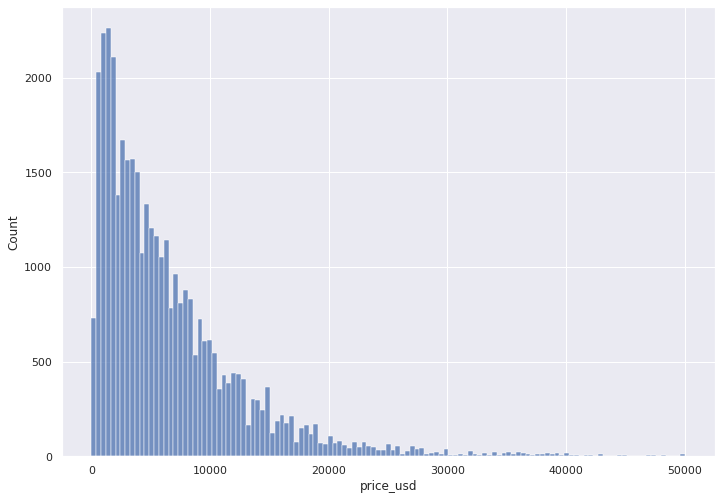

In [16]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
# f, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.6, .4)})
sns.histplot(df['price_usd'])

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='price_usd'>

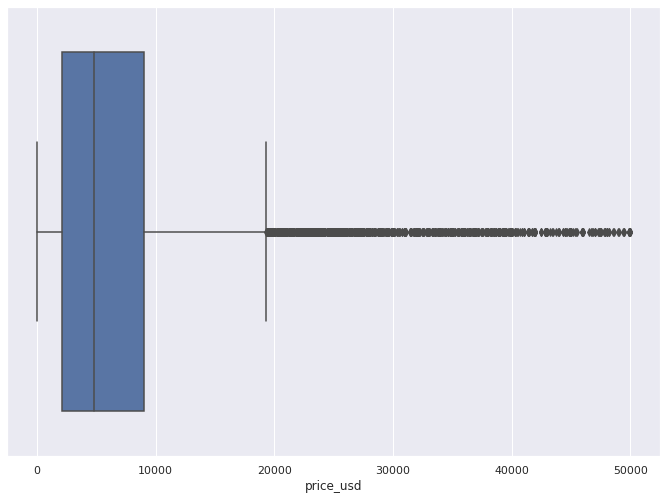

In [17]:
sns.boxplot(df['price_usd'])

como podemos ver en la grafica la distribucion de datos esta sesgada

<AxesSubplot:xlabel='engine_fuel', ylabel='price_usd'>

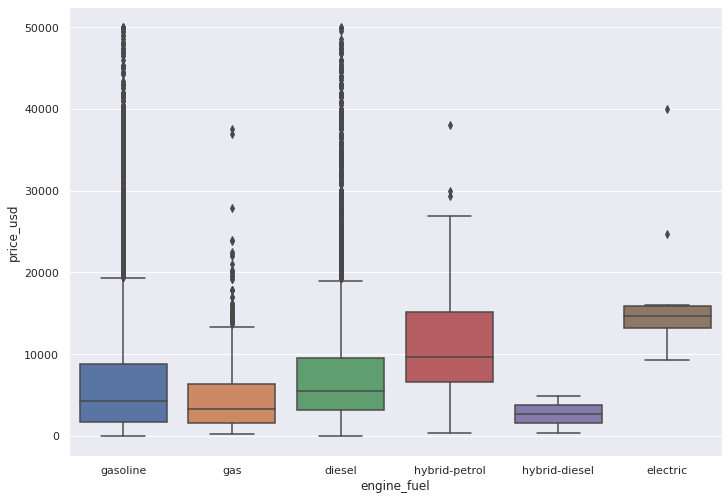

In [18]:
sns.boxplot(x = 'engine_fuel', y= 'price_usd', data=df)

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 0, '')]

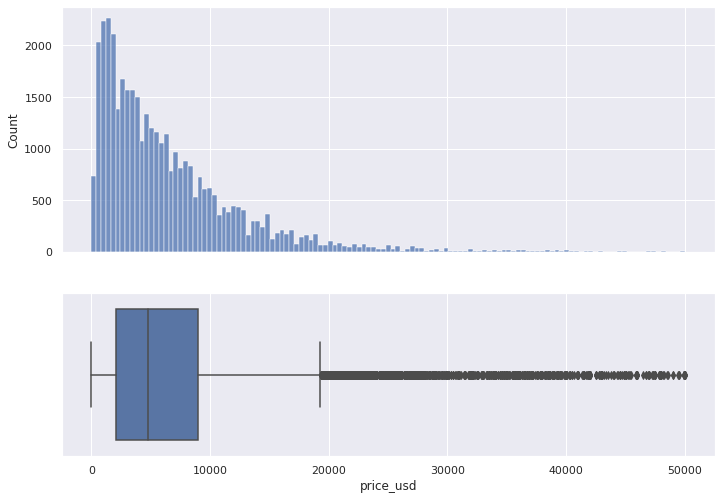

In [19]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
f, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.6, .4)})
sns.histplot(df['price_usd'], ax=ax_hist)
sns.boxplot(df['price_usd'], ax=ax_box)
ax_hist.set(xlabel='')

Es posible calcular varios box-plot separando por una cierta variable categórica:

<AxesSubplot:xlabel='engine_fuel', ylabel='price_usd'>

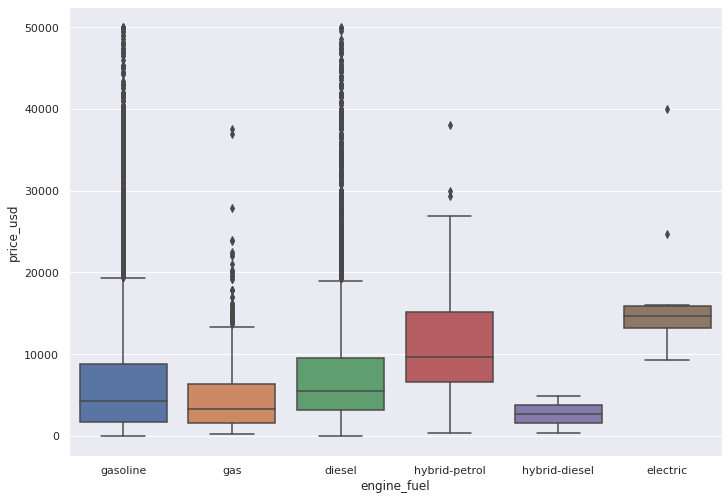

In [ ]:
sns.boxplot(x = 'engine_fuel', y = 'price_usd', data = df)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bc504059-8ad6-4235-92fa-88fa0fec1687' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>